In [45]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [46]:
X0, Y0 = load_iris(return_X_y=True)

In [47]:
pca = PCA(n_components=2) # количество измерений на которые будет производиться проекция 
print(pca)
U = pca.fit_transform(X0)

PCA(n_components=2)


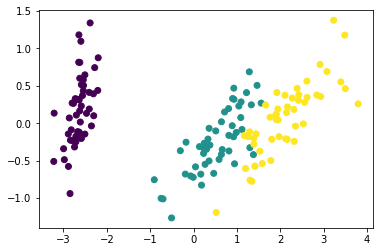

In [48]:
sc = plt.scatter(U[:,0], U[:,1], c=Y0)
plt.show()

In [49]:
U12 = U[Y0 != 0]
Y12 = Y0[Y0 != 0]
Y12[Y12==2] = -1
Y12[Y12==1] = 1
print(Y12)
print(Y12.shape)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
(100,)


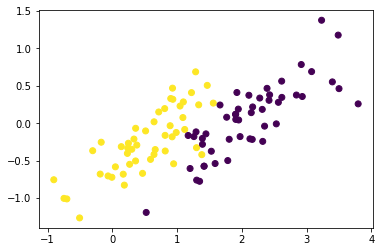

In [50]:
sc = plt.scatter(U12[:,0], U12[:,1], c=Y12)
plt.show()

In [51]:
import mltools.funcs as funcs
import mltools.lossfuncs as lossfuncs
import mltools.models as models
import mltools.risks as risks
import mltools.gda as gda

In [52]:
mod = models.LinearModel(2) # Создаем линейную модель (линейную функцию) от двух переменных

mod.param = np.random.random(mod.n_param) # Определяем параметры созданной модели (значениями от 0 до 3)

hinge_func = funcs.Hinge() # Определение отступа. 

loss_func = lossfuncs.MarginLoss(hinge_func) # Создаем экземпляр класс, считающий потери. Потери от отступа.  

risk_func = risks.Risk(mod, loss_func) # Вычисляем средние потери. 

gd = gda.GradientDescent(risk_func, tol=1.0e-6) # Модель обучения - градиентный спуск.

In [53]:
X = U12
Y = Y12
gd.fit(X, Y)

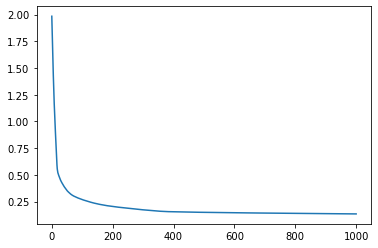

In [54]:
plt.plot(gd.rvals)
plt.show()

In [56]:
from sklearn.metrics import accuracy_score

YY = mod.evaluate(X) 
print(accuracy_score(np.sign(YY), Y))

0.95


In [57]:
xrange = np.linspace(-4,4,100)
yrange = np.linspace(-4,4,100)
XX, YY = np.meshgrid(xrange, yrange)
XY = np.c_[(XX.ravel(), YY.ravel())]
ZZ = mod.evaluate(XY)
ZZ = ZZ.reshape(XX.shape)

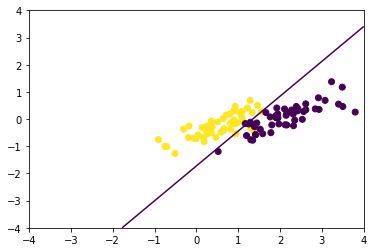

In [58]:
# Находим оптимально раздлеющую линию
plt.scatter(X[:,0], X[:,1], c=Y)
plt.contour(ZZ, levels=[0.], extent=(-4,4,-4,4))
plt.show() 

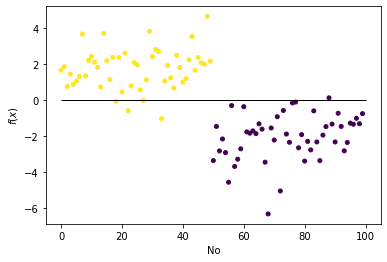

In [59]:
plt.scatter(range(100), mod.evaluate(X), c=Y, s=16)
plt.hlines(0, 0, 100, colors='k', linewidth=1.0)
plt.xlabel("No")
plt.ylabel(r"$f(x)$")
plt.show()

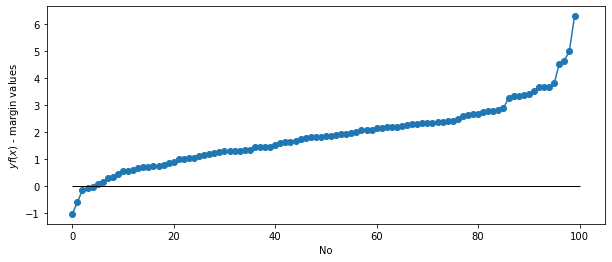

In [60]:
plt.figure(figsize=(10,4))
plt.plot(sorted(Y*mod.evaluate(X)),marker='o')
plt.hlines(0, 0, 100, colors='k', linewidth=1.0)
plt.xlabel("No")
plt.ylabel(r"$yf(x)$ - margin values")
plt.show()